# Chargement et Prétraitement du Dataset

- Importer les bibliothèques nécessaires.

In [2]:
# Data handling
import os
import random
import numpy as np

# Image processing
import cv2

# Encoding and splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [3]:
from tensorflow.keras.utils import to_categorical


In [4]:
# Path to your dataset
raw_data_path = "../data/raw_data/" 

# Set the fixed size for all images
image_size = (224, 224)   

In [6]:
images = []
labels = []

for class_name in os.listdir(raw_data_path) :

    class_path = os.path.join(raw_data_path, class_name)

    if not os.path.isdir(class_path) :
        continue

    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        print(image_path)

        # check if the extension are as required :
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            continue

        try:
             image = cv2.imread(image_path)

             image = cv2.resize(image , image_size)
             images.append(image)
             labels.append(class_name)
        except Exception as exception : 
             print(f"error in this image {image_path}: {exception}")

# Convert the images and labels lists to numpy arrays

images = np.array(images)
labels = np.array(labels)



../data/raw_data/glioma\Te-glTr_0000.jpg
../data/raw_data/glioma\Te-glTr_0001.jpg
../data/raw_data/glioma\Te-glTr_0002.jpg
../data/raw_data/glioma\Te-glTr_0003.jpg
../data/raw_data/glioma\Te-glTr_0004.jpg
../data/raw_data/glioma\Te-glTr_0005.jpg
../data/raw_data/glioma\Te-glTr_0006.jpg
../data/raw_data/glioma\Te-glTr_0007.jpg
../data/raw_data/glioma\Te-glTr_0008.jpg
../data/raw_data/glioma\Te-glTr_0009.jpg
../data/raw_data/glioma\Te-gl_0010.jpg
../data/raw_data/glioma\Te-gl_0011.jpg
../data/raw_data/glioma\Te-gl_0012.jpg
../data/raw_data/glioma\Te-gl_0013.jpg
../data/raw_data/glioma\Te-gl_0014.jpg
../data/raw_data/glioma\Te-gl_0015.jpg
../data/raw_data/glioma\Te-gl_0016.jpg
../data/raw_data/glioma\Te-gl_0017.jpg
../data/raw_data/glioma\Te-gl_0018.jpg
../data/raw_data/glioma\Te-gl_0019.jpg
../data/raw_data/glioma\Te-gl_0020.jpg
../data/raw_data/glioma\Te-gl_0021.jpg
../data/raw_data/glioma\Te-gl_0022.jpg
../data/raw_data/glioma\Te-gl_0023.jpg
../data/raw_data/glioma\Te-gl_0024.jpg
../da

### Loading and Preprocessing Images

In this step, we loop through each folder in the dataset, where each folder represents a class (e.g., "glioma", "meningioma", etc.). For every image in these folders:

1. We first **check that the file has a valid image extension** (`.png`, `.jpg`, `.jpeg`, `.bmp`). This ensures that non-image files are ignored and prevents errors during processing.
2. Using a **try-except block**, we attempt to read each image with OpenCV. If an image is corrupted or unreadable, it is skipped, and an error message is displayed. This makes the code robust to data issues.
3. Each successfully loaded image is **resized to a fixed size** (224×224 pixels). CNNs require input images to have the same dimensions, so resizing is necessary for consistent processing.
4. The resized image is added to a list of images, and its corresponding class label is added to a list of labels.  

Finally, we convert these lists into **NumPy arrays** so that they can be efficiently used as input to a Convolutional Neural Network.

**Why this is important:**  
This process ensures that our dataset is clean, uniform, and ready for machine learning. It handles corrupted files gracefully and standardizes image dimensions, which are critical steps for training a robust CNN model.


#### Vérifier l’équilibre entre les classes et appliquer un rééquilibrage si nécessaire.

In [7]:

counts = Counter(labels)
max_count = max(counts.values())

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                             height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

aug_images, aug_labels = [], []

for class_name, count in counts.items():
    if count < max_count:

        indices = [i for i, lbl in enumerate(labels) if lbl == class_name]
        needed = max_count - count

        
        
        for i in range(needed):
            img = np.expand_dims(images[indices[i % len(indices)]], 0)
            aug_img = next(datagen.flow(img, batch_size=1))[0].astype(np.uint8)
            aug_images.append(aug_img)
            aug_labels.append(class_name)

images = np.concatenate([images, np.array(aug_images)], axis=0)
labels = np.concatenate([labels, np.array(aug_labels)], axis=0)

print("Balanced dataset size:", images.shape, labels.shape)


Balanced dataset size: (8000, 224, 224, 3) (8000,)


###  Rééquilibrage des classes

Certaines classes contiennent moins d’images que d’autres, ce qui peut déséquilibrer le modèle.  
Pour corriger cela, on applique une **Data Augmentation** : des transformations aléatoires (rotation, zoom, décalage, retournement) sont générées à partir des images existantes des classes minoritaires jusqu’à ce que chaque classe atteigne la même taille que la plus grande.

Ainsi, le dataset devient **équilibré et plus varié**, ce qui améliore la capacité du modèle à généraliser.


##### Shuffle the Dataset
We shuffle the images and labels to randomize the order, ensuring the CNN sees a mix of all classes during training and that the train/test split is representative.


In [39]:
combined = list(zip(images, labels))

random.shuffle(combined)

images, labels = zip(*combined)
images_shuffled = np.array(images)
labels_shuffled  = np.array(labels)

print(images_shuffled)


[[[[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]]

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]]

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]]

  ...

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]]

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]]

  [[ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]
   ...
   [ 10  10  10]
   [ 10  10  10]
   [ 10  10  10]]]


 [[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1

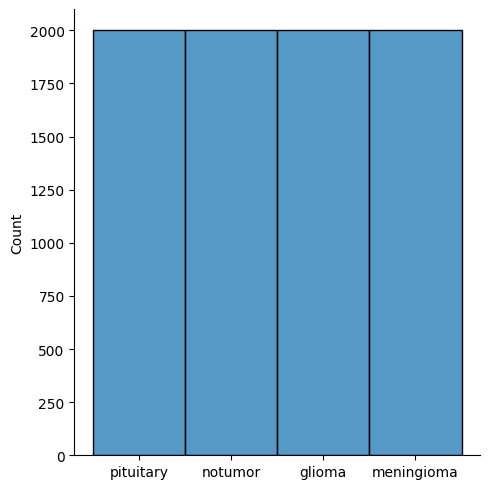

In [9]:
sns.displot(labels)

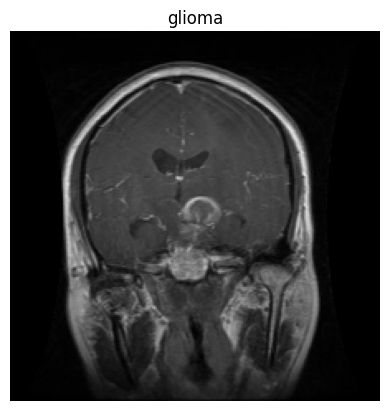

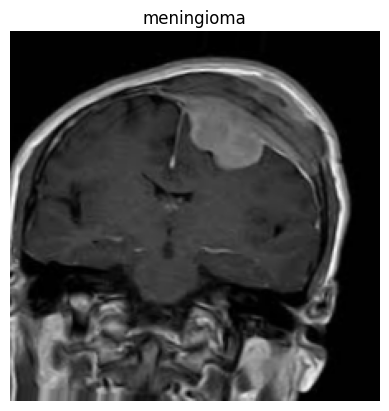

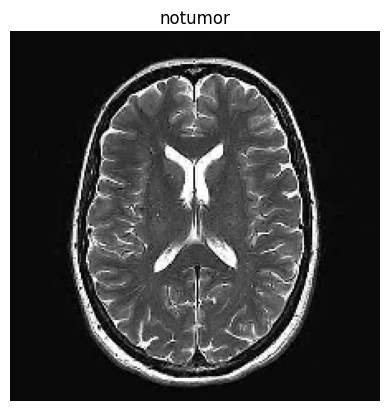

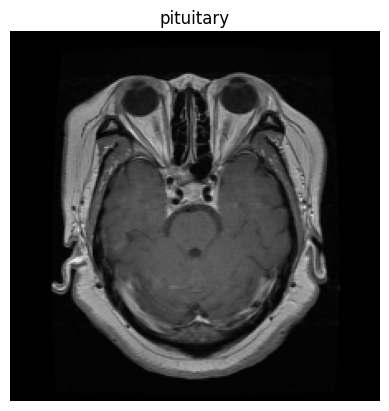

In [40]:
class_names = np.unique(labels)

for c_name in class_names :
    index = labels.index(c_name)
    plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))  
    plt.title(labels[index])
    plt.axis('off')
    plt.show()


In [41]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_shuffled)

# Convert numeric labels to one-hot vectors
labels_categorical = to_categorical(labels_encoded)

print("Classes:", label_encoder.classes_)
print("Example encoded labels:", labels_categorical[:5])

Classes: ['glioma' 'meningioma' 'notumor' 'pituitary']
Example encoded labels: [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [67]:
np.save('../models/classes.npy', label_encoder.classes_)

### Label and One-Hot Encoding

- **Label Encoding:**  
  Converts categorical class names into numeric IDs.  
  Example: `"glioma" → 0, "meningioma" → 1, "notumor" → 2, "pituitary" → 3`.  
  Used to give each class a unique number.

- **One-Hot Encoding:**  
  Converts numeric labels into binary vectors to represent classes.  
  Example: `2 → [0, 0, 1, 0]`.  
  Each vector marks the correct class with 1 and all others with 0.  
  This is important for multi-class classification in neural networks.

- **Purpose:**  
  Allows models to handle categorical labels properly without misinterpreting numeric values as continuous quantities.


In [36]:
import numpy as np

unique_class, class_counts = np.unique(labels_encoded, return_counts=True)
for u, c in zip(unique_class, class_counts):
    print(f"Class {u}: {c} images")


Class 0: 2000 images
Class 1: 2000 images
Class 2: 2000 images
Class 3: 2000 images


##### Diviser les données en ensembles d’entraînement et de test.

In [42]:

X_train, X_test, y_train, y_test = train_test_split(
    images_shuffled, labels_categorical, 
    test_size=0.2, random_state=42, stratify=labels_shuffled
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (6400, 224, 224, 3) (6400, 4)
Test set: (1600, 224, 224, 3) (1600, 4)


### Division du dataset

Le dataset est divisé en deux sous-ensembles à l’aide de `train_test_split` :  
- **Ensemble d’entraînement (80 %)** pour apprendre le modèle,  
- **Ensemble de test (20 %)** pour évaluer ses performances sur des données inédites.  

L’option `stratify` garantit que la proportion de chaque classe reste la même dans les deux ensembles.


##### Normaliser les valeurs des pixels dans la plage [0, 1].

In [43]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Normalized pixel range:", X_train.min(), "to", X_train.max())


Normalized pixel range: 0.0 to 1.0


### Normalisation des valeurs des pixels

Les images sont composées de pixels dont les valeurs varient entre 0 et 255.  
Pour faciliter l’apprentissage du modèle et améliorer la stabilité du réseau de neurones,  
ces valeurs sont normalisées dans la plage [0, 1] en divisant chaque pixel par 255.  
Cette étape accélère la convergence et réduit les risques d’instabilité numérique.


In [85]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


#### Définir l’architecture CNN (Conv2D + MaxPooling + Dropout + Dense) avec des paramètres optimaux.
Choisir les meilleures fonctions d’activation pour les couches cachées et la couche de sortie.

In [86]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    Dropout(0.3),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    Dropout(0.4),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  
])


c:\Users\kaout\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###  Définition de l’architecture CNN

Le modèle CNN est constitué de plusieurs couches :
- **Conv2D** : extrait les caractéristiques des images (formes, textures…)
- **MaxPooling2D** : réduit la dimension tout en gardant les informations essentielles
- **Dropout** : évite le surapprentissage en désactivant temporairement certains neurones
- **Dense** : effectue la classification finale

L’architecture typique combine plusieurs blocs Convolution + Pooling, suivis de couches denses pour la prédiction.


### Fonctions d’activation

- **ReLU** pour les couches cachées : rapide, efficace, aide à résoudre le problème du gradient qui disparaît.  
- **Softmax** pour la couche de sortie : transforme les scores en probabilités pour la classification multi-classes.


##### Compiler le modèle (ex. : Optimiseur Adam, fonction de perte categorical_crossentropy).

In [87]:
from tensorflow.keras.optimizers import Adam

# Set learning rate
learning_rate = 0.001

# Define optimizer with learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


###  Compilation du modèle avec taux d’apprentissage

- **Optimizer (Adam)** : ajuste les poids du réseau en utilisant le taux d’apprentissage spécifié.  
- **Learning rate** : contrôle la vitesse de mise à jour des poids (ex. 0.001).  
- **Loss (categorical_crossentropy)** : mesure l’erreur pour la classification multi-classes.  
- **Metric (accuracy)** : suit la performance du modèle pendant l’entraînement.


##### Utiliser les fonctions model.summary() et plot_model() pour vérifier l’architecture du modèle.

In [88]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
plot_model(model, show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### Vérification de l’architecture

- **model.summary()** : affiche toutes les couches, leurs sorties et le nombre de paramètres.  
- **plot_model()** : visualisation graphique de la structure du réseau, utile pour la documentation ou les rapports.


In [90]:
batch_size = 32
epochs = 30

### Détermination des hyperparamètres

Les hyperparamètres (taux d’apprentissage, nombre d’époques, taille de batch) contrôlent la manière dont le modèle apprend.  
Ils peuvent être choisis manuellement, testés avec une recherche par grille/aléatoire ou optimisés automatiquement avec des outils comme Keras Tuner.  
Bien les définir est crucial pour assurer une bonne convergence et une généralisation optimale du modèle.


In [91]:
# Save best model based on validation accuracy
checkpoint = ModelCheckpoint(
    '../models/best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [92]:
start_time = time.time()

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[checkpoint, early_stop]
)

end_time = time.time()
print(f"Training duration: {end_time - start_time:.2f} seconds")


Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.5337 - loss: 1.3647
Epoch 1: val_accuracy improved from None to 0.66484, saving model to ../models/best_model.h5


160/160 ━━━━━━━━━━━━━━━━━━━━ 73s 450ms/step - accuracy: 0.6334 - loss: 0.9207 - val_accuracy: 0.6648 - val_loss: 0.8064
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.7834 - loss: 0.5309
Epoch 2: val_accuracy improved from 0.66484 to 0.79844, saving model to ../models/best_model.h5


160/160 ━━━━━━━━━━━━━━━━━━━━ 72s 447ms/step - accuracy: 0.8012 - loss: 0.5006 - val_accuracy: 0.7984 - val_loss: 0.6026
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8611 - loss: 0.3711
Epoch 3: val_accuracy improved from 0.79844 to 0.87187, saving model to ../models/best_model.h5


160/160 ━━━━━━━━━━━━━━━━━━━━ 72s 448ms/step - accuracy: 0.8553 - loss: 0.3733 - val_accuracy: 0.8719 - val_loss: 0.4496
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.8949 - loss: 0.2916
Epoch 4: val_accuracy did not improve from 0.87187
160/160 ━━━━━━━━━━━━━━━━━━━━ 72s 451ms/step - accuracy: 0.8904 - loss: 0.2920 - val_accuracy: 0.8523 - val_loss: 0.3941
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9139 - loss: 0.2143
Epoch 5: val_accuracy did not improve from 0.87187
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 370ms/step - accuracy: 0.9084 - loss: 0.2288 - val_accuracy: 0.8695 - val_loss: 0.3682
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9368 - loss: 0.1666
Epoch 6: val_accuracy improved from 0.87187 to 0.88594, saving model to ../models/best_model.h5


160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 341ms/step - accuracy: 0.9354 - loss: 0.1690 - val_accuracy: 0.8859 - val_loss: 0.3179
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9472 - loss: 0.1362
Epoch 7: val_accuracy improved from 0.88594 to 0.89453, saving model to ../models/best_model.h5


160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 341ms/step - accuracy: 0.9486 - loss: 0.1369 - val_accuracy: 0.8945 - val_loss: 0.2815
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.9607 - loss: 0.1041
Epoch 8: val_accuracy did not improve from 0.89453
160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 341ms/step - accuracy: 0.9541 - loss: 0.1238 - val_accuracy: 0.8758 - val_loss: 0.2936
Epoch 9/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.9662 - loss: 0.0946
Epoch 9: val_accuracy did not improve from 0.89453
160/160 ━━━━━━━━━━━━━━━━━━━━ 54s 338ms/step - accuracy: 0.9633 - loss: 0.0994 - val_accuracy: 0.8820 - val_loss: 0.2808
Epoch 10/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.9690 - loss: 0.0766
Epoch 10: val_accuracy did not improve from 0.89453
160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 342ms/step - accuracy: 0.9682 - loss: 0.0839 - val_accuracy: 0.8773 - val_loss: 0.3079
Epoch 11/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9715 - loss: 0.0770
Epoch 11: va

160/160 ━━━━━━━━━━━━━━━━━━━━ 55s 342ms/step - accuracy: 0.9795 - loss: 0.0577 - val_accuracy: 0.9133 - val_loss: 0.2334
Epoch 14/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.9795 - loss: 0.0626
Epoch 14: val_accuracy did not improve from 0.91328
160/160 ━━━━━━━━━━━━━━━━━━━━ 54s 340ms/step - accuracy: 0.9766 - loss: 0.0683 - val_accuracy: 0.8977 - val_loss: 0.2820
Epoch 15/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.9707 - loss: 0.0692
Epoch 15: val_accuracy did not improve from 0.91328
160/160 ━━━━━━━━━━━━━━━━━━━━ 54s 340ms/step - accuracy: 0.9721 - loss: 0.0695 - val_accuracy: 0.9000 - val_loss: 0.2581
Epoch 16/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9766 - loss: 0.0589
Epoch 16: val_accuracy did not improve from 0.91328
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 353ms/step - accuracy: 0.9789 - loss: 0.0528 - val_accuracy: 0.9055 - val_loss: 0.2526
Epoch 17/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.9856 - loss: 0.0390
Epoch 17

### Entraînement du modèle

Le modèle est entraîné avec `model.fit()` :  
- Les données d’entraînement sont utilisées pour apprendre les poids.  
- Les données de validation permettent de suivre la performance sur des données non vues.  
- Les hyperparamètres `epochs` et `batch_size` définissent la durée et la granularité de l’entraînement.  
- Le résultat est stocké dans `history` pour visualiser les courbes de perte et d’accuracy.


###  Sauvegarde du meilleur modèle

On utilise `ModelCheckpoint` pour sauvegarder automatiquement le modèle ayant **la meilleure performance sur les données de validation**.  
- `monitor='val_accuracy'` : on suit l’accuracy sur validation  
- `save_best_only=True` : on garde uniquement le modèle qui s’améliore  
- Cela permet d’éviter de perdre les poids optimaux même si le modèle continue à s’entraîner.


In [93]:
from tensorflow.keras.models import load_model

best_model = load_model('../models/best_model.h5')


test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9125 - loss: 0.2763
Test Loss: 0.2763
Test Accuracy: 0.9125


###  Évaluation sur l’ensemble de test

Après l’entraînement, on évalue le modèle sur les données de test pour mesurer sa **performance réelle** :  
- `test_loss` : erreur moyenne sur le test  
- `test_accuracy` : proportion de prédictions correctes sur les données non vues.  

Cela permet de vérifier si le modèle **généralise bien** et n’a pas surappris les données d’entraînement.


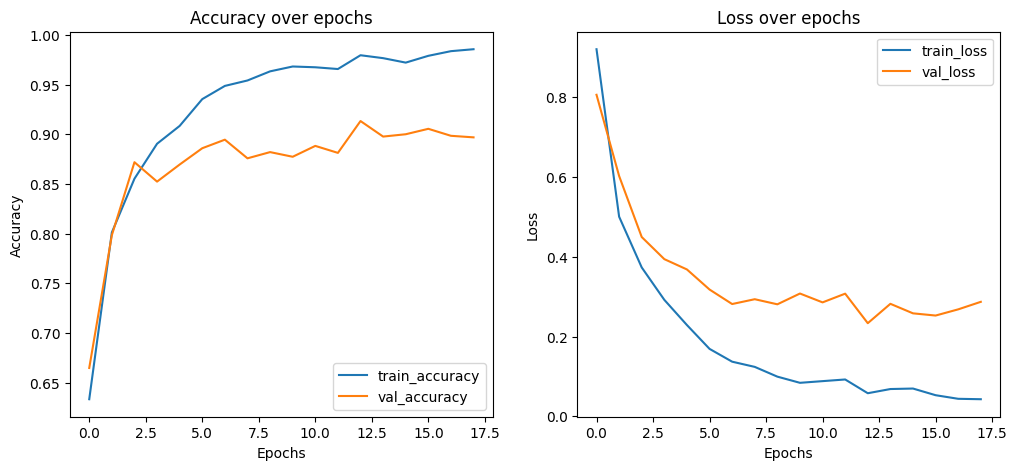

In [94]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


###  Courbes d’apprentissage

Les courbes d’accuracy et de loss permettent de visualiser le comportement du modèle au fil des epochs :  
- Vérifier la convergence et la stabilité du modèle  
- Identifier le surapprentissage ou le sous-apprentissage  
- Aider à ajuster les hyperparamètres si nécessaire


In [80]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.float64(0.0): np.int64(19200), np.float64(1.0): np.int64(6400)}


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step


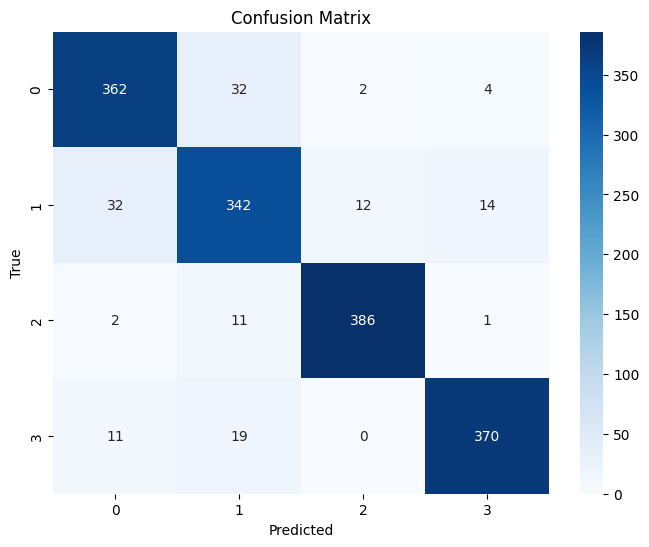

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       400
           1       0.85      0.85      0.85       400
           2       0.96      0.96      0.96       400
           3       0.95      0.93      0.94       400

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



In [96]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)


### Évaluation détaillée par classe

- **Matrice de confusion** : montre le nombre de prédictions correctes et incorrectes pour chaque classe.  
- **Rapport de classification** : fournit la précision, le rappel et le score F1 par classe.  
Ces métriques permettent d’identifier si certaines classes sont **plus difficiles à prédire** et d’analyser les erreurs du modèle.


###  Exemples de prédictions

- Affiche quelques images correctement classées et quelques erreurs.  
- Permet de **comprendre visuellement** les performances du modèle et d’identifier des patterns d’erreurs.  
- Utile pour la présentation des résultats dans un rapport ou une démonstration.


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step


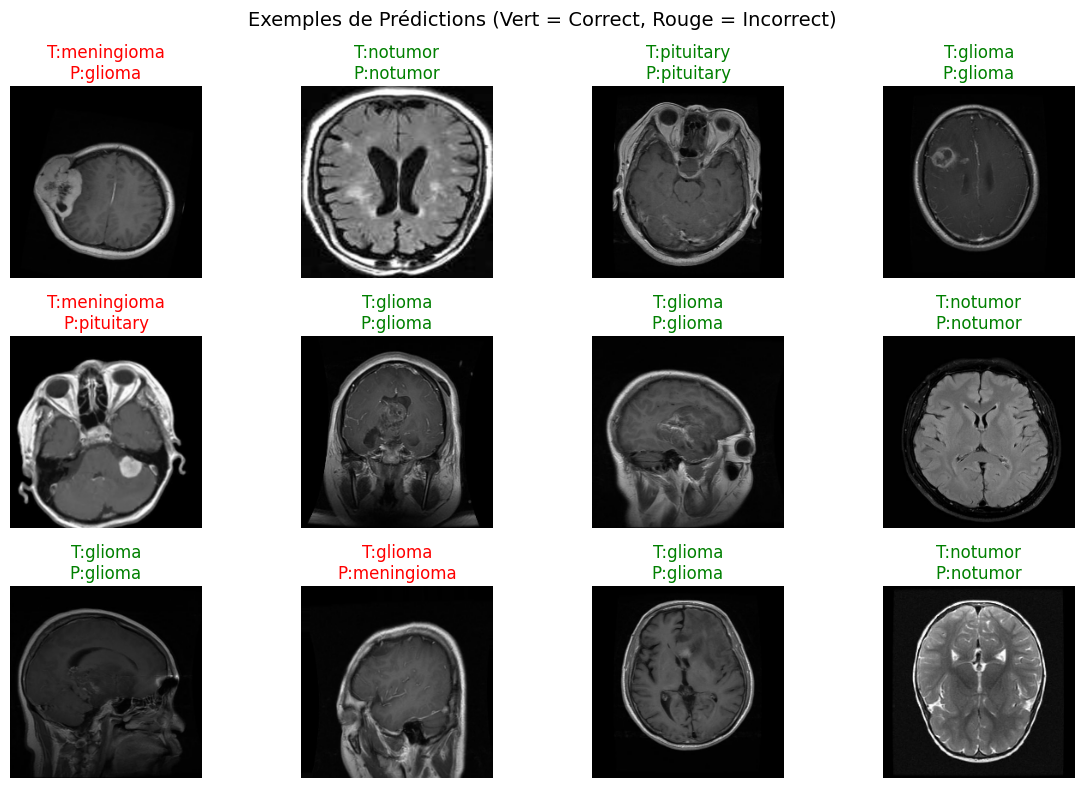

In [98]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Pick random sample indices to visualize
indices = random.sample(range(len(X_test)), 12)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[idx])
    true_label = label_encoder.classes_[y_true[idx]]
    pred_label = label_encoder.classes_[y_pred_classes[idx]]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"T:{true_label}\nP:{pred_label}", color=color)
    plt.axis("off")

plt.suptitle("Exemples de Prédictions (Vert = Correct, Rouge = Incorrect)", fontsize=14)
plt.tight_layout()
plt.show()


### Visualisation des Prédictions Correctes et Incorrectes

Cette étape permet d’évaluer visuellement les performances du modèle sur des exemples réels issus de l’ensemble de test.  
L’objectif est d’observer quelles images ont été **correctement classées** (titre en vert) et lesquelles ont été **mal classées** (titre en rouge).

- **T (True)** représente la classe réelle de l’image.  
- **P (Predicted)** indique la classe prédite par le modèle.  
- En comparant les deux, on peut identifier les types d’erreurs que le modèle commet encore.  
- Cette analyse visuelle aide à comprendre si les erreurs proviennent d’un manque de données, d’une similarité visuelle entre certaines classes ou d’un surapprentissage.

L’exemple de code affiche un ensemble aléatoire d’images avec leurs prédictions, colorées selon la justesse du résultat.


In [100]:
model.save('../models/model_cnn.keras')


### Sauvegarde du Modèle Entraîné

Une fois le modèle entraîné et évalué, il est essentiel de le sauvegarder pour éviter de devoir recommencer tout l’entraînement.

- Le modèle est enregistré au format **`.h5`** (format standard Keras / TensorFlow).  
- Cette sauvegarde contient :
  - Les **poids** du modèle (weights)  
  - L’**architecture complète** du réseau  
  - Et la **configuration de l’optimiseur**

Cela permet de **charger le modèle ultérieurement** pour faire des prédictions ou pour un déploiement via une interface comme Streamlit, sans réentraîner le modèle.
